In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy import stats
from scipy import constants as con
import pandas as pd
from scipy.interpolate import interp1d

In [3]:
#Import data from measurement and remove dark current
wavelength=np.arange(350,651,1) 
nist_no_nd=-np.array([-1.954024e-07, -2.0941635e-07, -2.266921e-07, -2.3987385e-07, -2.5668025e-07, -2.5142275e-07, -2.6336045e-07, -2.769191e-07, -2.9032635e-07, -3.0597405e-07, -3.1873144999999996e-07, -3.324593e-07, -3.463463e-07, -3.5924165e-07, -3.742004e-07, -3.888952e-07, -4.0496325e-07, -4.2165120000000003e-07, -4.3992265e-07, -4.5929535e-07, -4.765969e-07, -5.036491499999999e-07, -5.2709465e-07, -5.5322545e-07, -5.804615500000001e-07, -6.088943000000001e-07, -6.3212545e-07, -6.694945e-07, -6.9533645e-07, -7.274536000000001e-07, -7.661561999999999e-07, -7.9300955e-07, -8.252592e-07, -8.652238499999999e-07, -8.988115999999999e-07, -9.3290995e-07, -9.674252e-07, -9.985823e-07, -1.0413909999999999e-06, -1.070568e-06, -1.115487e-06, -1.152994e-06, -1.1886864999999999e-06, -1.2254345e-06, -1.2586505e-06, -1.289328e-06, -1.3206635e-06, -1.3470824999999998e-06, -1.37061e-06, -1.4033535e-06, -1.4209249999999999e-06, -1.4516915e-06, -1.4771615000000001e-06, -1.5041749999999999e-06, -1.5304709999999998e-06, -1.5563685000000001e-06, -1.5758374999999999e-06, -1.6088775e-06, -1.632905e-06, -1.652177e-06, -1.661849e-06, -1.6835870000000001e-06, -1.715247e-06, -1.7467605e-06, -1.7768875e-06, -1.8095645e-06, -1.8426314999999999e-06, -1.8703449999999999e-06, -1.896856e-06, -1.926489e-06, -1.9544515e-06, -1.9800575000000003e-06, -2.001238e-06, -2.018119e-06, -2.0395575e-06, -2.053679e-06, -2.072305e-06, -2.0936410000000002e-06, -2.111678e-06, -2.134369e-06, -2.1525430000000003e-06, -2.1747735e-06, -2.2013094999999997e-06, -2.220428e-06, -2.2490085e-06, -2.270986e-06, -2.2891555e-06, -2.3069825e-06, -2.3184465e-06, -2.3287789999999997e-06, -2.339733e-06, -2.3536419999999997e-06, -2.3728245e-06, -2.3910995e-06, -2.4202135000000004e-06, -2.4521025e-06, -2.489363e-06, -2.5217565e-06, -2.5727114999999997e-06, -2.6068969999999997e-06, -2.6599555e-06, -2.696403e-06, -2.723407e-06, -2.7599345e-06, -2.7918575e-06, -2.8277375e-06, -2.85295e-06, -2.8968725e-06, -2.942666e-06, -2.9978255e-06, -3.0776309999999998e-06, -3.132621e-06, -3.2189135e-06, -3.2952125000000003e-06, -3.354672e-06, -3.440325e-06, -3.489803e-06, -3.5470305e-06, -3.5905005000000003e-06, -3.5973015e-06, -3.5931560000000002e-06, -3.5825475e-06, -3.5474110000000002e-06, -3.509432e-06, -3.4683399999999997e-06, -3.4281595e-06, -3.397091e-06, -3.377471e-06, -3.367163e-06, -3.363966e-06, -3.363262e-06, -3.3656665e-06, -3.3661285e-06, -3.369483e-06, -3.3718310000000003e-06, -3.371796e-06, -3.378501e-06, -3.388079e-06, -3.396925e-06, -3.4166304999999997e-06, -3.4378679999999997e-06, -3.4563600000000002e-06, -3.4732905e-06, -3.4811874999999998e-06, -3.481475e-06, -3.4790715e-06, -3.4674665000000003e-06, -3.4584835e-06, -3.4477875000000002e-06, -3.4426949999999997e-06, -3.439987e-06, -3.437487e-06, -3.4394065e-06, -3.4424705e-06, -3.4434765e-06, -3.447007e-06, -3.4518179999999998e-06, -3.459915e-06, -3.466492e-06, -3.474536e-06, -3.4851510000000002e-06, -3.495083e-06, -3.508124e-06, -3.5193655000000003e-06, -3.532676e-06, -3.545355e-06, -3.5607645000000003e-06, -3.5743325e-06, -3.5854109999999997e-06, -3.5984125e-06, -3.613018e-06, -3.623499e-06, -3.634804e-06, -3.643284e-06, -3.654775e-06, -3.6594295e-06, -3.6697895e-06, -3.6763230000000003e-06, -3.677978e-06, -3.6848675000000003e-06, -3.693162e-06, -3.6971590000000003e-06, -3.7057690000000004e-06, -3.713956e-06, -3.7251619999999997e-06, -3.7354684999999997e-06, -3.745493e-06, -3.7582440000000002e-06, -3.780625e-06, -3.7993e-06, -3.817698e-06, -3.8355435e-06, -3.8534635e-06, -3.8739764999999996e-06, -3.895172499999999e-06, -3.912647e-06, -3.924682000000001e-06, -3.93891e-06, -3.946532e-06, -3.9542175e-06, -3.9559225e-06, -3.9608035e-06, -3.959952e-06, -3.957510499999999e-06, -3.9529335e-06, -3.947838e-06, -3.938374e-06, -3.929928e-06, -3.924915e-06, -3.9130965e-06, -3.9059510000000005e-06, -3.8948475e-06, -3.890732000000001e-06, -3.8862539999999995e-06, -3.883017e-06, -3.8837845e-06, -3.884036e-06, -3.8822295e-06, -3.8867525e-06, -3.890923999999999e-06, -3.8956195000000005e-06, -3.9082230000000005e-06, -3.911037999999999e-06, -3.917478e-06, -3.925336499999999e-06, -3.9334055e-06, -3.9402465000000005e-06, -3.95312e-06, -3.958237e-06, -3.966219e-06, -3.973639e-06, -3.984607e-06, -3.9910040000000005e-06, -3.9996885e-06, -4.009463e-06, -4.020023e-06, -4.030819000000001e-06, -4.0380225e-06, -4.0511905e-06, -4.063848499999999e-06, -4.0721165e-06, -4.0765365000000005e-06, -4.089899e-06, -4.0980615e-06, -4.108788500000001e-06, -4.121679e-06, -4.128798499999999e-06, -4.1358465e-06, -4.1462205000000005e-06, -4.1540285e-06, -4.1640355e-06, -4.168090500000001e-06, -4.167453e-06, -4.1733375000000004e-06, -4.1750155e-06, -4.177559999999999e-06, -4.1803035e-06, -4.18304e-06, -4.182775e-06, -4.184195e-06, -4.185878e-06, -4.1837395e-06, -4.186807500000001e-06, -4.1871219999999994e-06, -4.1820135e-06, -4.1836375e-06, -4.182815500000001e-06, -4.181136e-06, -4.173549e-06, -4.1626945e-06, -4.1565185000000005e-06, -4.1449785e-06, -4.135645e-06, -4.11736e-06, -4.103281e-06, -4.084555e-06, -4.06754e-06, -4.0468145e-06, -4.030688e-06, -4.010365e-06, -3.9914125e-06, -3.9711375e-06, -3.9472295e-06, -3.9268775e-06, -3.906982e-06, -3.890422e-06, -3.8666960000000005e-06, -3.8516165e-06, -3.834878e-06, -3.821480500000001e-06, -3.8150715e-06, -3.810851e-06, -3.8092695e-06, -3.8094295e-06, -3.811511e-06, -3.8148515e-06, -3.8149305e-06, -3.8128145e-06, -3.806397e-06, -3.798508e-06, -3.782469e-06])
sipm=np.array(pd.read_csv("sipm_QE.csv", header=None))
nist=-np.array(pd.read_csv("nist_QE.csv", header=None))

nist_dk=3.8583867999999996e-14 #2.5162236e-13
sipm_dk=2.493832e-06 #1.7706650000000001e-06


nist-=nist_dk
sipm-=sipm_dk

#Import data from datasheets
nd5_old = np.array(pd.read_csv('ND5_old.csv', header=None)).transpose()                             #transmission of ND filter
nd3=np.array(pd.read_csv('ND3.csv',sep="\t", header=None)).transpose()
nd5=np.array(pd.read_csv('ND5.csv',sep=",", header=None)).transpose()
spectral=np.array(pd.read_csv('nist.csv', skiprows=5, encoding='latin1',delimiter=";")).transpose()    #NIST spectral responsivity
xenon=np.array(pd.read_csv('xenon_lamp_output.csv', header=None)).transpose()                          #Xenon Lamp spectral power distribution
mono=np.array(pd.read_csv('mono.csv',sep=";",decimal=",")).transpose()                                 #Monochromator efficiency
pde_datasheet=np.array(pd.read_csv('PDE_SIPM.csv',sep=";",decimal=",",header=None)).transpose()

pde_comp=np.interp(wavelength,pde_datasheet[0],pde_datasheet[1])
nist_photons=np.interp(wavelength,spectral[0],spectral[1])

<function matplotlib.pyplot.show(close=None, block=None)>

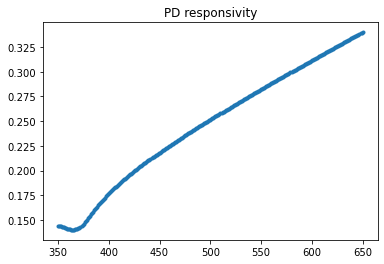

In [ ]:

plt.title("PD responsivity")
plt.plot(wavelength,nist_photons,'.')
plt.show

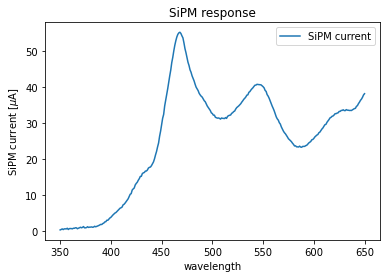

In [6]:
plt.title("SiPM response")
plt.plot(wavelength,sipm*1e6, label="SiPM current") #Current is measured with Pico amp ?
plt.ylabel("SiPM current [$\mu$A]")
plt.xlabel("wavelength")
plt.legend()
plt.show()

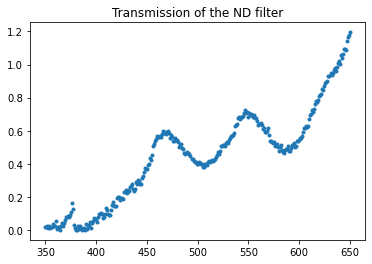

1.2243323436695204


(0.0, 2.5)

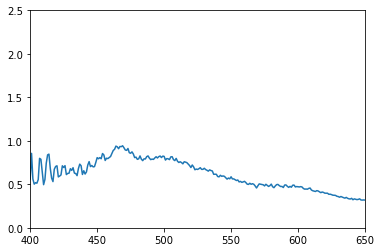

In [41]:
plt.title("Transmission of the ND filter")
plt.plot(nd[0],nd[1]*1000,'.')
convert_transmission=interp1d(nd[0],nd[1]*1000)
plt.show()
plt.plot(wavelength,(sipm*1e4)/convert_transmission(wavelength), label="SiPM current *1e4") #Current is measured with Pico amp ?
plt.xlim(400,650)
plt.ylim(0,2.5)

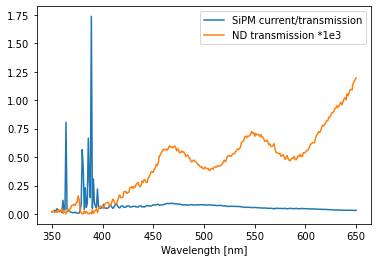

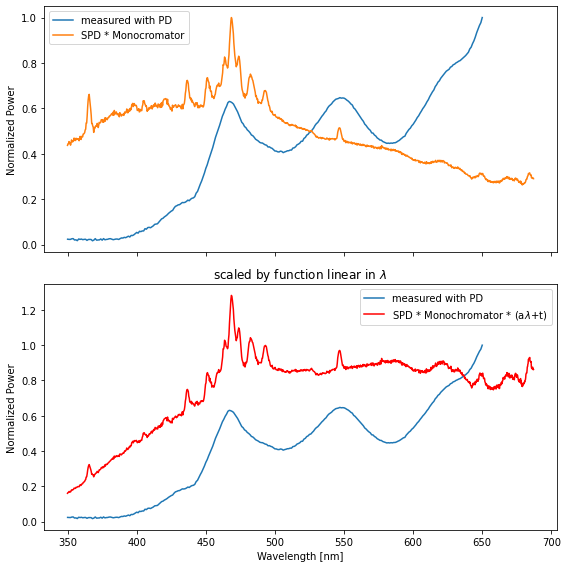

In [26]:
transmission=[]
for wl in wavelength:
    transmission.append(float(nd[1][np.argwhere(nd[0]==wl)][0]))
transmission = np.array(transmission)
sipm/=transmission

#Plot SiPM corrected current
plt.plot(wavelength,sipm,label="SiPM current/transmission")
plt.plot(wavelength,transmission*1e3, label="ND transmission *1e3")
plt.xlabel("Wavelength [nm]")
plt.legend()
plt.show()

#Normalize Nist
max_nist=np.max(nist[0])
nist[0]/=max_nist

#Multiply by monochromator efficiency
mono_interp = np.interp(xenon[0], mono[0], mono[1])
xenon_mono =xenon[1]*mono_interp 
xenon_wl=xenon[1]*mono_interp*(0.17*xenon[0]-55)

#Normalize Xenon Lamp
xenon_mono/=np.max(xenon_mono)
print(np.max(xenon_wl))

#Make Plots
fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# First subplot: nist and xenon_scaled
axs[0].set_ylabel("Normalized Power")
axs[0].legend()

# Second subplot: nist and xenon_wl
axs[1].plot(wavelength, nist[0], label="measured with PD")
axs[1].plot(xenon[0], xenon_wl, label="SPD * Monochromator * (a$\\lambda$+t)", color="red")
axs[1].set_xlabel("Wavelength [nm]")
axs[1].set_ylabel("Normalized Power")
axs[1].legend()
axs[1].set_title("scaled by function linear in $\lambda$")

plt.tight_layout()
plt.show()

In [3]:
#sipm1=np.array([4.262345499999999e-06, 4.6516180000000006e-06, 5.57041e-06, 7.918716999999999e-06, 1.216526e-05, 1.7060214999999997e-05, 1.262104e-05, 1.301367e-05, 1.4327754999999999e-05, 1.0646574999999999e-05, 1.0308095e-05, 1.2072365e-05, 1.3196675e-05])
#sipm2=np.array([2.9548345e-06, 3.0021045e-06, 3.8846825e-06, 6.2316435000000004e-06, 1.0186795e-05, 1.498693e-05, 1.136417e-05, 1.190262e-05, 1.3173235e-05, 9.7280765e-06, 9.5665085e-06, 1.1455555e-05, 1.2667185e-05])
#nist3=-np.array([-1.7233965e-07, -2.0941115e-07, -2.6494375e-07, -3.2673965000000003e-07, -4.0845155e-07, -5.309128e-07, -6.8406465e-07, -8.487119e-07, -1.029585e-06, -1.2045550000000001e-06, -1.343252e-06, -1.4787425e-06, -1.6120745e-06, -1.7717635e-06, -1.931394e-06, -2.0392419999999998e-06, -2.152635e-06, -2.276224e-06, -2.35967e-06, -2.4785355e-06, -2.704286e-06, -2.8805305e-06, -3.1564185e-06, -3.5443705e-06, -3.685816e-06, -3.511933e-06, -3.4520015e-06, -3.467859e-06, -3.5410060000000002e-06, -3.585865e-06, -3.5476135e-06, -3.56287e-06, -3.5986365e-06, -3.6661765e-06, -3.732712e-06, -3.7830435e-06, -3.8142934999999998e-06, -3.853056e-06, -3.9408215e-06, -4.043513e-06, -4.0872000000000004e-06, -4.07438e-06, -4.031489e-06, -4.00668e-06, -4.0231225e-06, -4.0570565e-06, -4.0987205e-06, -4.148481000000001e-06, -4.200578999999999e-06, -4.246189999999999e-06, -4.288483e-06, -4.3063644999999995e-06, -4.315166e-06, -4.3201065e-06, -4.292868e-06, -4.214362e-06, -4.1189125e-06, -4.009202e-06, -3.932657499999999e-06, -3.932379e-06, -3.900723500000001e-06])
#nist2=-np.array([-2.0095025000000002e-07, -2.4223585e-07, -3.0311455e-07, -3.692179e-07, -4.593515e-07, -5.873381e-07, -7.3921295e-07, -9.109813999999999e-07, -1.0919255e-06, -1.2716955e-06, -1.406331e-06, -1.5434645e-06, -1.677298e-06, -1.827712e-06, -1.990446e-06, -2.1013974999999997e-06, -2.2058045e-06, -2.327239e-06, -2.4043470000000002e-06, -2.521779e-06, -2.7455564999999998e-06, -2.9211489999999997e-06, -3.183256e-06, -3.5748275000000003e-06, -3.7275329999999997e-06, -3.5516394999999997e-06, -3.49193e-06, -3.505154e-06, -3.5728495e-06, -3.6221905e-06, -3.5813775e-06, -3.5928705e-06, -3.6315239999999997e-06, -3.6939415e-06, -3.768029e-06, -3.8164975e-06, -3.8516345e-06, -3.8940955e-06, -3.9842270000000004e-06, -4.078912e-06, -4.1279415e-06, -4.121346e-06, -4.078533e-06, -4.053756e-06, -4.067037e-06, -4.1076825e-06, -4.1513459999999995e-06, -4.1986425e-06, -4.2518905e-06, -4.2475275e-06, -4.2905835e-06, -4.307741e-06, -4.3104695e-06, -4.315009e-06, -4.2871785e-06, -4.213685e-06, -4.1186380000000005e-06, -4.009414e-06, -3.932748e-06, -3.9294405e-06, -3.8932e-06])
#sipm=np.array([2.3830085e-06, 2.4331980000000002e-06, 2.3229535e-06, 2.3739384999999997e-06, 2.543739e-06, 2.4822544999999996e-06, 2.706063e-06, 2.8681645000000003e-06, 3.082887e-06, 3.940956499999999e-06, 5.2517615e-06, 6.531747e-06, 7.710482000000001e-06, 9.690480500000001e-06, 1.217229e-05, 1.5219195e-05, 1.757364e-05, 1.8836265e-05, 2.0642850000000002e-05, 2.4789685e-05, 3.2575665000000005e-05, 4.20765e-05, 5.1629954999999996e-05, 5.937102e-05, 5.950107e-05, 5.2604345000000004e-05, 4.7096595e-05, 4.3441355e-05, 4.081301e-05, 3.8766675e-05, 3.6006365e-05, 3.481356e-05, 3.4709255e-05, 3.522339e-05, 3.638996e-05, 3.8119259999999997e-05, 4.0114235e-05, 4.1979955000000005e-05, 4.4311240000000006e-05, 4.508489e-05, 4.406563e-05, 4.13628e-05, 3.7689945e-05, 3.4177305e-05, 3.129489e-05, 2.8757409999999997e-05, 2.682225e-05, 2.5895385000000002e-05, 2.5993705000000002e-05, 2.676893e-05, 2.8312675e-05, 2.9914669999999998e-05, 3.1877045e-05, 3.387651e-05, 3.5636700000000004e-05, 3.6280625e-05, 3.650526e-05, 3.6694824999999995e-05, 3.7209774999999996e-05, 3.906397e-05, 4.1540624999999995e-05])


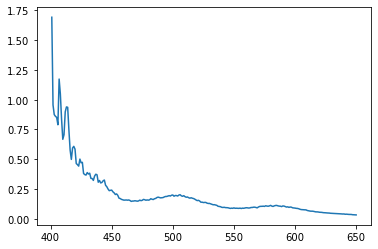

In [27]:
ratio=sipm/nist[0]

mask = wavelength > 400
wavelength_filtered = wavelength[mask]
ratio_filtered=ratio[mask]

plt.plot(wavelength_filtered,ratio_filtered)
plt.show()

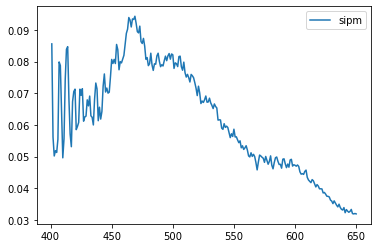

In [5]:
#SiPM plot

# Filter for wavelengths > 400 nm
mask = wavelength > 400
wavelength_filtered = wavelength[mask]
sipm_filtered = sipm[mask]
transmission_filtered = np.array(transmission)[mask]

# SiPM plot for wavelengths > 400 nm
plt.plot(wavelength_filtered, sipm_filtered, label="sipm")

plt.legend()
plt.show()

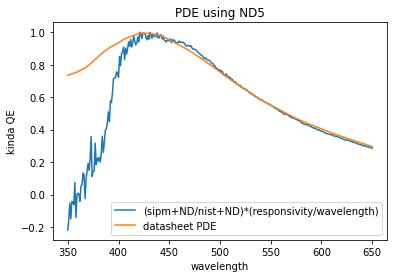

In [5]:
# (SIPM + ND _filter / NIST+ND_filter)*NIST_responsivity=PDE of the SIPM 
pde_sipm=sipm[0]/nist[0]*nist_photons/wavelength
pde_sipm/=np.max(pde_sipm)
plt.plot(wavelength,pde_sipm,label="(sipm+ND/nist+ND)*(responsivity/wavelength)")
plt.plot(wavelength,pde_comp/50,label="datasheet PDE")
plt.title("PDE using ND5")
plt.ylabel("kinda QE")
plt.xlabel("wavelength")
plt.legend()
plt.show()

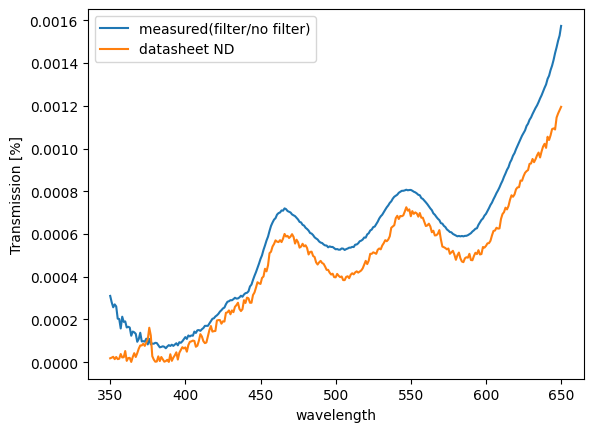

In [5]:
transm_nd=nist[0]/nist_no_nd*100
plt.plot(wavelength,transm_nd,label="measured(filter/no filter)")
plt.plot(nd5_old[0],nd5_old[1],label="datasheet ND")
plt.ylabel("Transmission [%]")
plt.xlabel("wavelength")
plt.legend()
plt.show()

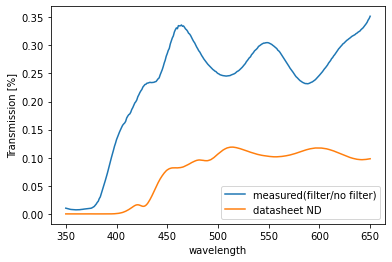

In [51]:
transm_nd=nist[2]/nist_no_nd*50
plt.plot(wavelength,transm_nd,label="measured(filter/no filter)")
plt.plot(nd3[0],nd3[1],label="datasheet ND")
plt.ylabel("Transmission [%]")
plt.xlabel("wavelength")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


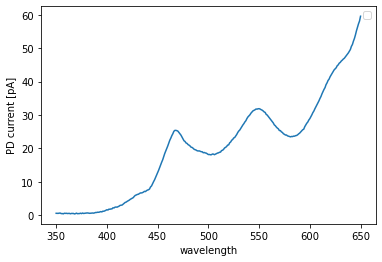

In [21]:
plt.plot(wavelength,nist[0]*1e12)
plt.ylabel("PD current [pA]")
plt.xlabel("wavelength")
plt.legend()
plt.show()

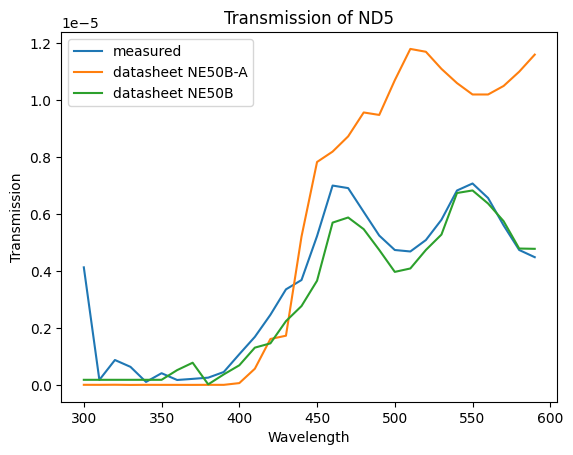

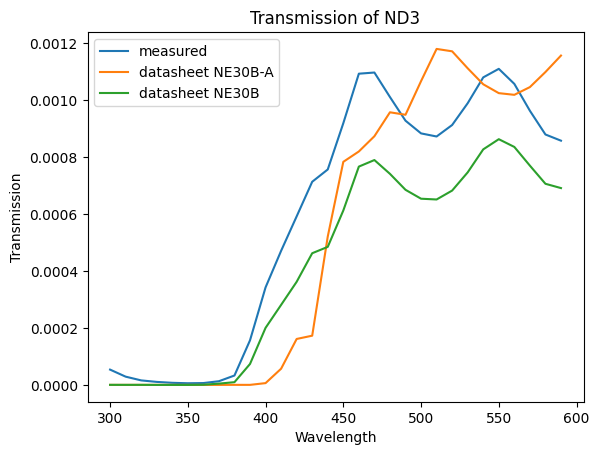

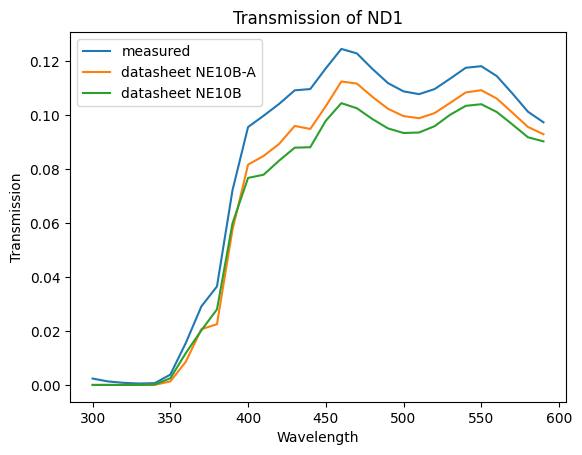

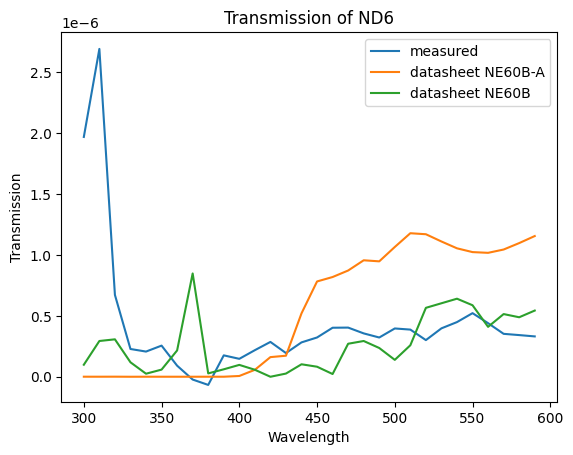

In [39]:
#ND-Filter Validation
filters=["ND5","ND3","ND1","ND6"]
names=["NE50B","NE30B","NE10B","NE60B",] 
sep=[",","\t",",",","] 
wavelength=np.arange(300,600,10)
data=-np.array(pd.read_csv("ND_filter_test.csv",header=None))
darkrate=8.456024e-14
data-=darkrate
for i in range(len(filters)):
    ratio=data[i+2]/data[0]
    plt.plot(wavelength,ratio,label="measured")
    ref=np.array(pd.read_csv(f'{filters[i]}.csv',sep=sep[i], header=None)).transpose()
    plt.plot(wavelength,np.interp(wavelength,ref[0],ref[1])*0.01,label=f"datasheet {names[i]}-A")
    ref2=np.array(pd.read_csv(f'{filters[i]}_old.csv',sep=",", header=None)).transpose()
    plt.plot(wavelength,np.interp(wavelength,ref2[0],ref2[1])*0.01,label=f"datasheet {names[i]}")
    plt.legend()
    plt.title(f"Transmission of {filters[i]}")
    plt.xlabel("Wavelength")
    plt.ylabel("Transmission")
    plt.show()